In [105]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
Url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(Url)

In [106]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [107]:
titanic = titanic[['Pclass','Sex','Age','SibSp','Parch','Fare','Survived']]
titanic

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,0
887,1,female,19.0,0,0,30.0000,1
888,3,female,NaN,1,2,23.4500,0
889,1,male,26.0,0,0,30.0000,1


In [108]:
titanic.describe().round(2)

,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.00,714.00,891.00,891.00,891.00,891.00
mean,2.31,29.70,0.52,0.38,32.20,0.38
std,0.84,14.53,1.10,0.81,49.69,0.49
min,1.00,0.42,0.00,0.00,0.00,0.00
25%,2.00,20.12,0.00,0.00,7.91,0.00
50%,3.00,28.00,0.00,0.00,14.45,0.00
75%,3.00,38.00,1.00,0.00,31.00,1.00
max,3.00,80.00,8.00,6.00,512.33,1.00


In [109]:
print('Titanic Null Percentage: \n',(titanic.isnull().sum()/len(titanic)).round(3).sort_values(ascending=False))

Titanic Null Percentage: 
 Age         0.199
Pclass      0.000
Sex         0.000
SibSp       0.000
Parch       0.000
Fare        0.000
Survived    0.000
dtype: float64


<AxesSubplot:xlabel='Fare', ylabel='Density'>

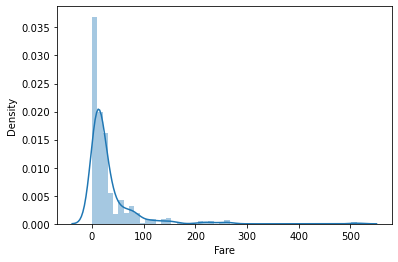

In [110]:
sns.distplot(titanic.Fare)

<AxesSubplot:xlabel='Fare'>

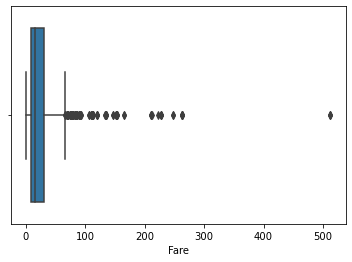

In [111]:
sns.boxplot(titanic.Fare)

In [112]:
IQR = titanic.Fare.quantile(.75) - titanic.Fare.quantile(.25)
lower_bound = titanic.Fare.quantile(.25) - (IQR * 1.5)
upper_bound = titanic.Fare.quantile(.75) + (IQR * 1.5)
print(lower_bound) , print(upper_bound), print(titanic.Fare.mean())

-26.724
65.6344
32.2042079685746


(None, None, None)

In [113]:
titanic.loc[titanic['Fare']>=66,'Fare']=66

<AxesSubplot:xlabel='Fare', ylabel='Density'>

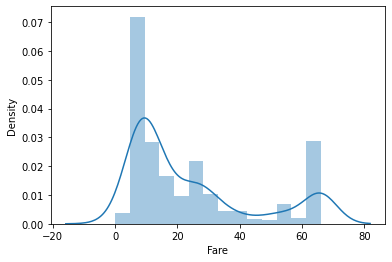

In [114]:
sns.distplot(titanic.Fare)

In [115]:
titanic['age'] = titanic.groupby(['Sex','Pclass'],as_index=False)['Age'].transform('mean').round()
titanic

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,age
0,3,male,22.0,1,0,7.250,0,27.0
1,1,female,38.0,1,0,66.000,1,35.0
2,3,female,26.0,0,0,7.925,1,22.0
3,1,female,35.0,1,0,53.100,1,35.0
4,3,male,35.0,0,0,8.050,0,27.0
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.000,0,31.0
887,1,female,19.0,0,0,30.000,1,35.0
888,3,female,NaN,1,2,23.450,0,22.0
889,1,male,26.0,0,0,30.000,1,41.0


In [116]:
titanic.Age.fillna(titanic['age'],inplace=True)

<AxesSubplot:xlabel='Age', ylabel='Density'>

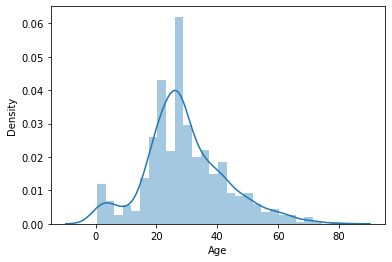

In [117]:
sns.distplot(titanic['Age'])

<AxesSubplot:xlabel='Age'>

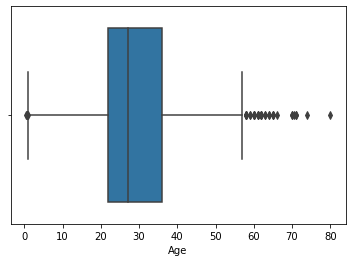

In [118]:
sns.boxplot(titanic.Age)

In [119]:
IQR = titanic.Age.quantile(.75) - titanic.Age.quantile(.25)
lower_bound = titanic.Age.quantile(.25) - (IQR * 1.5)
upper_bound = titanic.Age.quantile(.75) + (IQR * 1.5)
print(lower_bound) , print(upper_bound), print(titanic.Age.mean())

1.0
57.0
29.38290684624018


(None, None, None)

In [120]:
titanic.loc[titanic['Age']>=57,'Age']=57

In [121]:
titanic.groupby(['SibSp'],as_index=False)['Survived'].mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [122]:
titanic.groupby(['Pclass'],as_index=False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [123]:
titanic.groupby(['Sex'],as_index=False)['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [124]:
titanic.groupby(['Sex','Parch'],as_index=False)['Survived'].mean()

,Sex,Parch,Survived
0,female,0,0.788660
1,female,1,0.766667
2,female,2,0.612245
3,female,3,0.750000
4,female,4,0.000000
5,female,5,0.250000
6,female,6,0.000000
7,male,0,0.165289
8,male,1,0.327586
9,male,2,0.322581


In [125]:
titanic.groupby(['age'],as_index=False)['Survived'].mean().sort_values(by='Survived',ascending=False)

,age,Survived
4,35.0,0.968085
2,29.0,0.921053
0,22.0,0.500000
5,41.0,0.368852
3,31.0,0.157407
1,27.0,0.135447


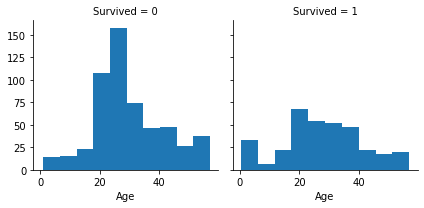

In [126]:
grid = sns.FacetGrid(titanic,col='Survived')
grid.map(plt.hist,'Age')

In [130]:
titanic['Sex'] = titanic['Sex'].map({'male':0,'female':1})

In [131]:
X = titanic.drop(['Survived'],axis=1)
y = titanic['Survived']

In [132]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [133]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.7932960893854749

In [144]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random'],
    'max_features': range(2,32,1)
    
}

In [145]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [146]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'max_features': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [147]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 22,
 'max_features': 7,
 'min_samples_leaf': 6,
 'min_samples_split': 7,
 'splitter': 'random'}

In [143]:
grid_search.best_score_

0.8286516300600807

In [148]:
clf1 = DecisionTreeClassifier(criterion='entropy',max_depth= 22,max_features=7,min_samples_leaf= 6, min_samples_split= 7,splitter= 'random')
clf1.fit(X_train,y_train)
clf1.score(X_test,y_test)

0.7932960893854749

In [155]:
y_pred = clf1.predict(X_test)

In [159]:
probs = clf1.predict_proba(X_test)
probs

array([[0.91666667, 0.08333333],
       [0.8125    , 0.1875    ],
       [0.7       , 0.3       ],
       [0.        , 1.        ],
       [0.55555556, 0.44444444],
       [0.        , 1.        ],
       [0.36842105, 0.63157895],
       [0.71428571, 0.28571429],
       [0.36842105, 0.63157895],
       [0.        , 1.        ],
       [0.69230769, 0.30769231],
       [0.90909091, 0.09090909],
       [0.6       , 0.4       ],
       [1.        , 0.        ],
       [0.88888889, 0.11111111],
       [0.        , 1.        ],
       [0.69230769, 0.30769231],
       [0.36842105, 0.63157895],
       [1.        , 0.        ],
       [0.69230769, 0.30769231],
       [0.875     , 0.125     ],
       [0.67647059, 0.32352941],
       [0.55555556, 0.44444444],
       [0.7       , 0.3       ],
       [0.83333333, 0.16666667],
       [0.83333333, 0.16666667],
       [0.67647059, 0.32352941],
       [0.8125    , 0.1875    ],
       [0.83333333, 0.16666667],
       [0.36842105, 0.63157895],
       [0.

In [149]:
import pickle

filename = 'Dt Titanic.pkl'
pickle.dump(clf1, open(filename, 'wb'))

In [151]:
X_test.iloc[1]

Pclass     2.0
Sex        0.0
Age       31.0
SibSp      0.0
Parch      0.0
Fare      10.5
age       31.0
Name: 439, dtype: float64

In [157]:
y_test.iloc[150]

0

In [158]:
y_pred[150]

0

In [152]:
print(clf1.predict(np.array([[2.0, 0.0, 31.0, 0.0, 0.0, 10.5, 31.0]])))

[0]
